# 监督式机器学习
监督式机器学习是一种基于标注数据来配置（学习）计算模型参数的技术。在这个例子中，我们提供稀疏标注的数据，这意味着我们只标注了部分给定的数据点。

另请参阅
* [监督学习（维基百科）](https://en.wikipedia.org/wiki/Supervised_learning)
* [scikit-learn中的监督学习](https://scikit-learn.org/stable/supervised_learning.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

我们演示监督式机器学习的起点是一个双峰分布的一对测量值。在以下数据集中，面积较大的对象通常也更加细长。

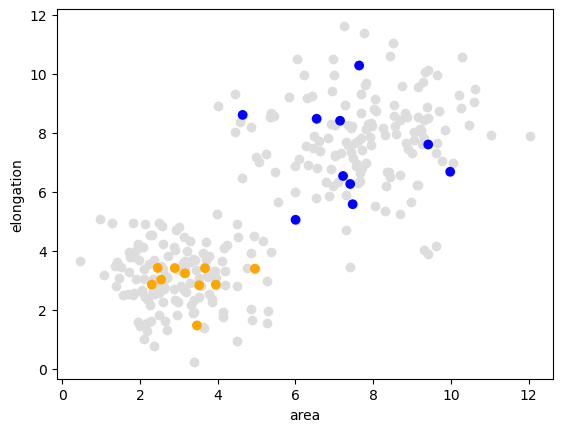

In [2]:
data = generate_biomodal_2d_data()

# select some data points
data_to_annotate = data[:20]

# manually annotate them
manual_annotation = [1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2]

# visualize the data
plt.scatter(data[:, 0], data[:, 1], c='#DDDDDD')
plt.xlabel('area')
plt.ylabel('elongation')

colors = ['orange', 'blue']
annotated_colors = [colors[i-1] for i in manual_annotation]

plt.scatter(data_to_annotate[:, 0], data_to_annotate[:, 1], c=annotated_colors)

## 分离测试和验证数据
在训练分类器之前，我们需要将标注数据分成两个子集。目的是实现无偏验证。我们在标注数据点的前半部分进行训练，并在后半部分测量质量。[了解更多](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage)。

In [3]:
train_data = data_to_annotate[:10]
validation_data = data_to_annotate[10:]

train_annotation = manual_annotation[:10]
validation_annotation = manual_annotation[10:]

## 分类器训练
有了选定的待标注数据和手动标注，我们可以训练一个[随机森林分类器](https://en.wikipedia.org/wiki/Random_forest)。

In [4]:
classifier = RandomForestClassifier()
classifier.fit(train_data, train_annotation)

RandomForestClassifier()

## 验证
我们现在可以将分类器应用于验证数据，并测量这些数据点中有多少被正确分析。

In [5]:
result = classifier.predict(validation_data)

# Show results next to annotation in a table
result_annotation_comparison_table = {
    "Predicted": result,
    "Annotated": validation_annotation
}
pd.DataFrame(result_annotation_comparison_table)

Predicted  Annotated
0          2          2
1          1          1
2          1          1
3          1          2
4          1          1
5          2          2
6          2          2
7          2          2
8          2          2
9          2          2

为了获得一些标准化的分类器结果质量度量，我们使用[scikit-learn的度量](https://scikit-learn.org/stable/modules/model_evaluation.html)。这些技术的概述也可在[维基百科](https://en.wikipedia.org/wiki/Precision_and_recall)上找到，在这里的背景下它们意味着：
* [准确率](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)：有多少比例的预测是正确的？
* [精确率](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)：预测为`1`的样本中有多少比例被标注为`1`？
* [召回率（敏感度）](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)：被标注为`2`的样本中有多少比例被预测为`2`？

In [6]:
accuracy_score(validation_annotation, result)

0.9

In [7]:
precision_score(validation_annotation, result)

0.75

In [8]:
recall_score(validation_annotation, result)

1.0

如果你想更详细地了解条目是如何计数的以及质量分数是如何计算的，可以看看[多标签混淆矩阵](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix)。

## 预测
在训练和验证分类器之后，我们可以重复使用它来处理其他数据集。
通常不会对测试和验证数据进行分类，因为这些应该只用于制作分类器。在这里，我们将分类器应用于剩余的未标注数据点。

In [9]:
remaining_data = data[20:]

prediction = classifier.predict(remaining_data)
prediction

array([1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2])

现在我们用类别颜色可视化整个数据集。

Text(0, 0.5, 'elongation')

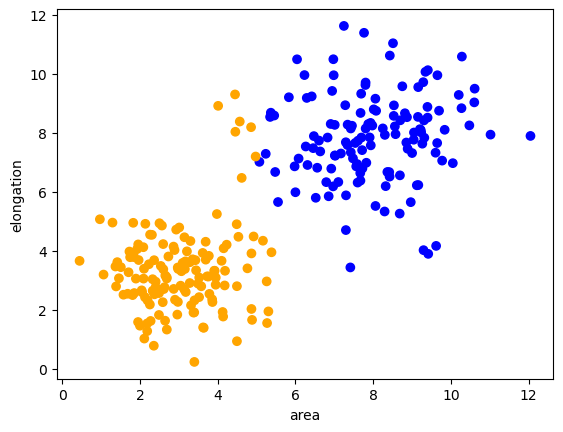

In [10]:
predicted_colors = [colors[i-1] for i in prediction]

plt.scatter(remaining_data[:, 0], remaining_data[:, 1], c=predicted_colors)
plt.xlabel('area')
plt.ylabel('elongation')

## 练习
训练一个[支持向量机](https://scikit-learn.org/stable/modules/svm.html)并可视化其预测。

In [11]:
from sklearn.svm import SVC

classifier = SVC()